<h1>Предсказание свойств молекул</h1>


Датасет dataset.csv
<ul>
<li>Molecular weight</li>
<li>Normal boiling point</li>
<li>Melting point</li>
<li>Critical temperature</li>
<li>Critical pressure</li>
<li>Critical volume</li>
<li>Heat of fusion</li>
<li>logP</li>
<li>Molecular refractivity</li>
</ul>


# Загрузка данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("dataset.csv")

In [ ]:
df

,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,smiles,Molecular weight,Normal boiling point,Melting point,Critical temperature,Critical pressure,Critical volume,Heat of fusion,logP,Molecular refractivity
0,0,0,0,C(Cl)(Cl)(Cl)Cl,153.82270,349.85,250.150,556.30,4540000.0,0.000276,NaN,2.55290,26.1430
1,1,1,1,C1=CC=C(C=C1)N,93.12648,457.25,267.150,705.00,5630000.0,0.000291,NaN,1.26880,30.8544
2,2,2,2,CCO,46.06844,351.39,159.050,514.00,6137000.0,0.000168,NaN,-0.00140,12.7598
3,3,3,3,CO,32.04186,337.65,175.150,512.50,8084000.0,0.000117,NaN,-0.39150,8.1428
4,4,4,4,CC(C)O,60.09502,355.36,183.650,508.30,4764000.0,0.000222,NaN,0.38710,17.3548
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,95,95,CC1=CC(=CC(=C1)O)C,122.16440,494.86,336.550,715.60,3800000.0,0.000396,-244400.0,2.00904,37.5808
96,96,96,96,CC1CCCCC1,98.18606,374.05,146.350,572.10,3480000.0,0.000369,NaN,2.58660,32.2490
97,97,97,97,CC1=CC=CC=C1,92.13842,383.75,179.200,591.75,4108000.0,0.000316,NaN,1.99502,31.1790
98,98,98,98,CC1=CC=NC=C1,93.12648,418.45,276.480,646.00,4650000.0,0.000300,NaN,1.39002,28.9740


# Общая информация

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0.2            100 non-null    int64  
 1   Unnamed: 0              100 non-null    int64  
 2   Unnamed: 0.1            100 non-null    int64  
 3   smiles                  100 non-null    object 
 4   Molecular weight        100 non-null    float64
 5   Normal boiling point    100 non-null    float64
 6   Melting point           100 non-null    float64
 7   Critical temperature    100 non-null    float64
 8   Critical pressure       100 non-null    float64
 9   Critical volume         100 non-null    float64
 10  Heat of fusion          10 non-null     float64
 11  logP                    100 non-null    float64
 12  Molecular refractivity  100 non-null    float64
dtypes: float64(9), int64(3), object(1)
memory usage: 10.3+ KB


In [ ]:
df = df.drop(['Unnamed: 0.2', 'Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [ ]:
df.describe()

,Molecular weight,Normal boiling point,Melting point,Critical temperature,Critical pressure,Critical volume,Heat of fusion,logP,Molecular refractivity
count,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.000000,10.000000,100.000000,100.000000
mean,93.145612,388.762700,230.150950,586.545190,1.224864e+07,0.000286,-112820.000000,1.650752,25.313502
std,38.194327,403.517172,369.138276,663.714351,7.924673e+07,0.000108,176553.755113,0.860518,11.499900
min,12.010700,145.250000,85.500000,0.869000,2.710000e+06,0.000027,-381500.000000,-0.425100,6.731000
25%,61.624285,280.725000,146.200000,437.700000,3.585250e+06,0.000208,-243875.000000,1.132875,16.594750
50%,92.352840,350.620000,178.275000,519.200000,4.075000e+06,0.000274,-162250.000000,1.698440,22.397400
75%,120.191580,417.250000,237.775000,618.862500,4.922500e+06,0.000369,64850.000000,2.299660,32.843800
max,209.815506,4273.150000,3823.150000,7020.500000,7.967190e+08,0.000563,116200.000000,3.993000,61.454000


# Визуализация данных и зависимостей

<ipython-input-215-ddbf91ecdc59>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


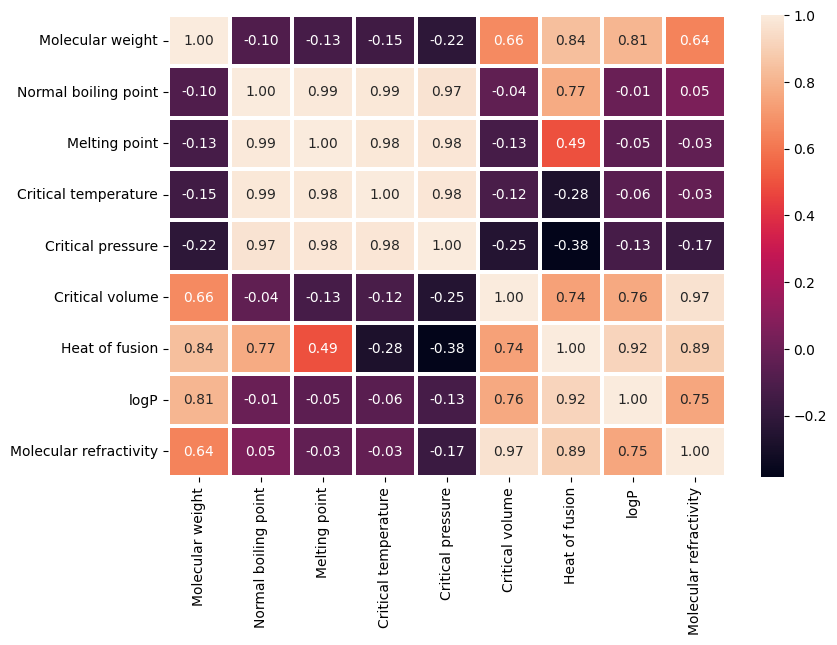

In [ ]:
import seaborn as sns
corr = df.corr()

f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()

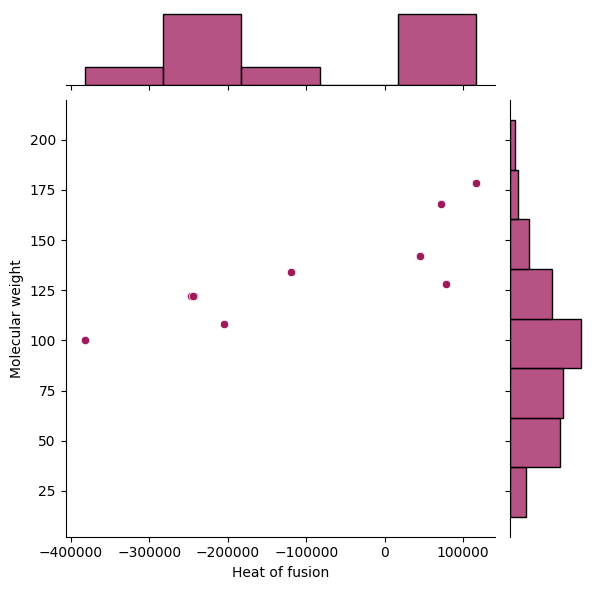

In [ ]:
sns.jointplot(x = 'Heat of fusion', y = 'Molecular weight', data = df, color="#9F1A5B")

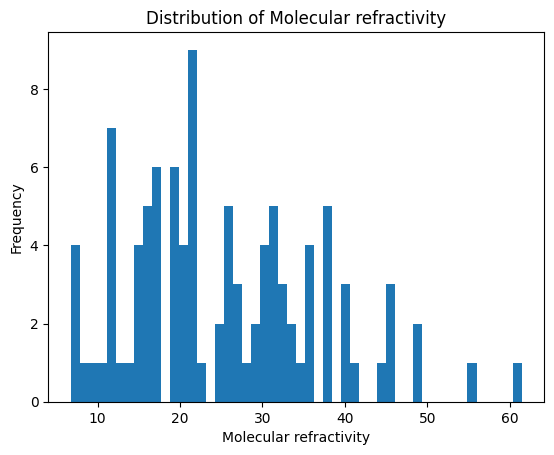

In [ ]:
plt.hist(df['Molecular refractivity'], bins = 50)
plt.title('Distribution of Molecular refractivity')
plt.xlabel('Molecular refractivity')
plt.ylabel('Frequency')
plt.show()

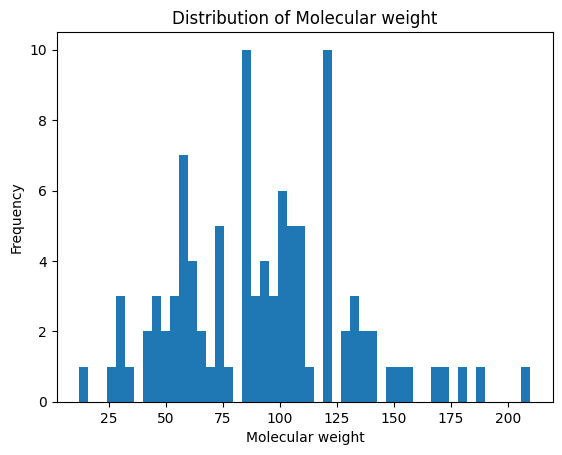

In [ ]:
plt.hist(df['Molecular weight'], bins = 50)
plt.title('Distribution of Molecular weight')
plt.xlabel('Molecular weight')
plt.ylabel('Frequency')
plt.show()

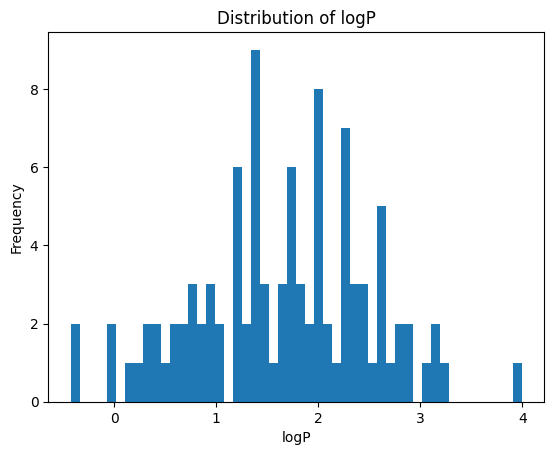

In [ ]:
plt.hist(df['logP'], bins = 50)
plt.title('Distribution of logP')
plt.xlabel('logP')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='Molecular weight', ylabel='Critical volume'>

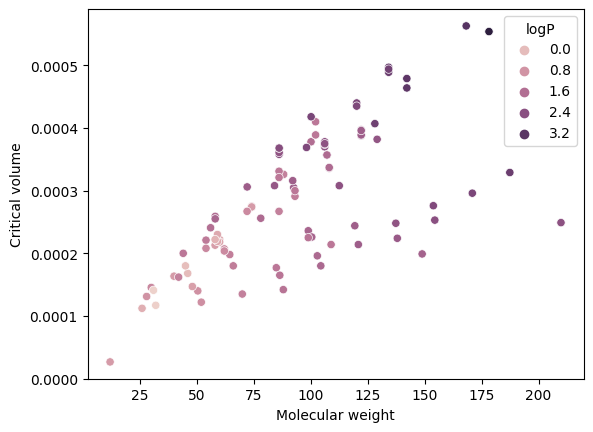

In [ ]:
sns.scatterplot(x='Molecular weight', y = 'Critical volume', hue = 'logP', data = df)

<Axes: xlabel='Molecular weight', ylabel='Critical volume'>

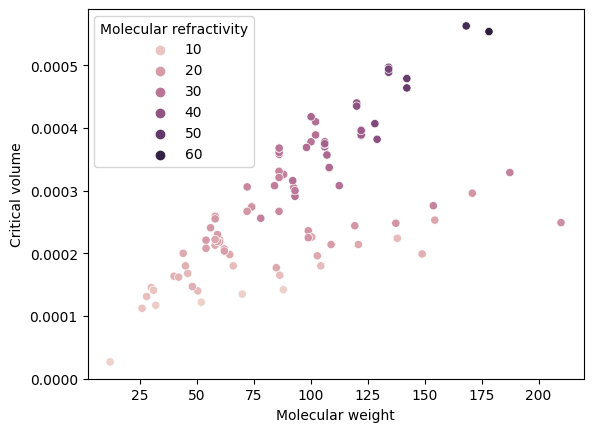

In [ ]:
sns.scatterplot(x='Molecular weight', y = 'Critical volume', hue = 'Molecular refractivity', data = df)

<Axes: xlabel='Molecular refractivity', ylabel='Critical volume'>

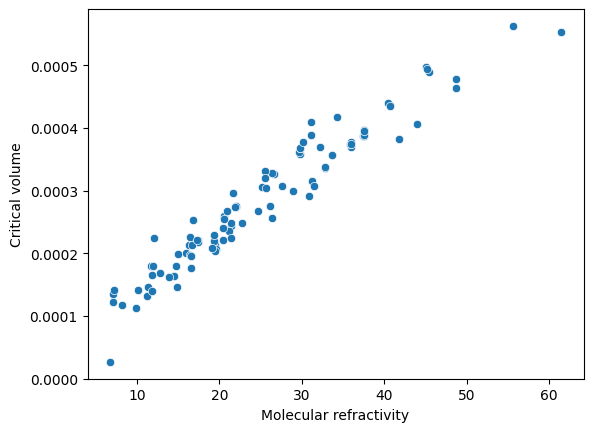

In [ ]:
sns.scatterplot(x='Molecular refractivity', y = 'Critical volume', data = df)

# Сортировка

In [ ]:
df.sort_values(by = 'Critical temperature')

,smiles,Molecular weight,Normal boiling point,Melting point,Critical temperature,Critical pressure,Critical volume,Heat of fusion,logP,Molecular refractivity
54,C1=CC=C2C(=C1)C=CC3=CC=CC=C32,178.229200,611.55,372.39,0.869,3171472.0,0.000554,116200.0,3.99300,61.454
42,C(F)(F)(F)F,88.004313,145.25,89.35,227.500,3680000.0,0.000142,NaN,1.47570,7.163
13,C=C,28.053160,169.35,104.05,282.340,5041000.0,0.000131,NaN,0.80220,11.254
48,C(C(F)(F)F)(F)(F)F,138.011819,195.05,172.80,293.020,3040000.0,0.000224,NaN,2.11100,12.110
34,C(F)(F)F,70.013850,191.15,115.60,299.000,4800000.0,0.000135,NaN,1.17850,7.112
...,...,...,...,...,...,...,...,...,...,...
71,C1=CC=C(C=C1)CC2=CC=CC=C2,168.234380,537.35,298.25,760.000,2710000.0,0.000563,71500.0,3.27740,55.690
59,CC1=CC2=CC=CC=C2C=C1,142.197100,514.25,306.85,761.000,3370000.0,0.000464,44900.0,3.14822,48.685
56,CC1=CC=CC2=CC=CC=C12,142.197100,517.55,251.15,772.000,3600000.0,0.000479,NaN,3.14822,48.685
58,C1=CC=C2C(=C1)C=CC=N2,129.158580,510.25,258.26,782.000,4750000.0,0.000382,NaN,2.23480,41.743


In [ ]:
df.sort_values(by = 'Critical pressure', ascending=False)

,smiles,Molecular weight,Normal boiling point,Melting point,Critical temperature,Critical pressure,Critical volume,Heat of fusion,logP,Molecular refractivity
11,C,12.01070,4273.15,3823.15,7020.50,796719000.0,0.000027,NaN,0.63610,6.7310
3,CO,32.04186,337.65,175.15,512.50,8084000.0,0.000117,NaN,-0.39150,8.1428
16,CN,31.05710,266.75,179.95,430.80,7620000.0,0.000141,NaN,-0.42510,10.1114
17,CS,48.10746,279.15,151.15,470.00,7230000.0,0.000147,NaN,0.54600,14.9100
15,CCl,50.48752,249.05,175.80,416.25,6680000.0,0.000140,NaN,0.85500,11.7770
...,...,...,...,...,...,...,...,...,...,...
65,CC1=CC(=C(C=C1C)C)C,134.21816,470.15,352.30,676.00,2900000.0,0.000489,-119900.0,2.92028,45.3900
73,CCCCC1=CC=CC=C1,134.21816,456.45,185.15,660.50,2890000.0,0.000497,NaN,3.02920,45.0540
74,CCC1=CC=C(C=C1)CC,134.21816,457.15,230.15,657.90,2803000.0,0.000494,NaN,2.81140,45.1980
87,CC(C)CC(C)C,100.20194,353.55,153.25,519.80,2740000.0,0.000418,NaN,2.68850,34.2930


In [ ]:
df.sort_values(by = 'Critical volume')

,smiles,Molecular weight,Normal boiling point,Melting point,Critical temperature,Critical pressure,Critical volume,Heat of fusion,logP,Molecular refractivity
11,C,12.010700,4273.15,3823.15,7020.500,796719000.0,0.000027,NaN,0.63610,6.7310
14,C#C,26.037280,189.15,192.40,308.300,6138000.0,0.000112,NaN,0.24940,9.8900
3,CO,32.041860,337.65,175.15,512.500,8084000.0,0.000117,NaN,-0.39150,8.1428
25,C(F)F,52.023386,221.50,137.15,351.250,5783000.0,0.000122,NaN,0.88290,7.0830
13,C=C,28.053160,169.35,104.05,282.340,5041000.0,0.000131,NaN,0.80220,11.2540
...,...,...,...,...,...,...,...,...,...,...
65,CC1=CC(=C(C=C1C)C)C,134.218160,470.15,352.30,676.000,2900000.0,0.000489,-119900.0,2.92028,45.3900
74,CCC1=CC=C(C=C1)CC,134.218160,457.15,230.15,657.900,2803000.0,0.000494,NaN,2.81140,45.1980
73,CCCCC1=CC=CC=C1,134.218160,456.45,185.15,660.500,2890000.0,0.000497,NaN,3.02920,45.0540
54,C1=CC=C2C(=C1)C=CC3=CC=CC=C32,178.229200,611.55,372.39,0.869,3171472.0,0.000554,116200.0,3.99300,61.4540


In [ ]:
df.sort_values(by = 'Molecular weight', ascending=False).head(20)

,smiles,Molecular weight,Normal boiling point,Melting point,Critical temperature,Critical pressure,Critical volume,Heat of fusion,logP,Molecular refractivity
35,C(F)(F)(Br)Br,209.815506,295.94,163.05,471.000,4070000.0,0.000249,NaN,2.32650,22.8010
45,C(C(F)(Cl)Cl)(F)(F)Cl,187.375610,320.75,238.15,487.200,3410000.0,0.000329,NaN,2.91890,26.3450
54,C1=CC=C2C(=C1)C=CC3=CC=CC=C32,178.229200,611.55,372.39,0.869,3171472.0,0.000554,116200.0,3.99300,61.4540
46,C(C(F)(F)Cl)(F)(F)Cl,170.921013,276.75,179.15,418.800,3255000.0,0.000296,NaN,2.64960,21.6000
71,C1=CC=C(C=C1)CC2=CC=CC=C2,168.234380,537.35,298.25,760.000,2710000.0,0.000563,71500.0,3.27740,55.6900
47,C(C(F)(F)Cl)(F)(F)F,154.466416,233.95,173.75,353.000,3130000.0,0.000253,NaN,2.38030,16.8550
0,C(Cl)(Cl)(Cl)Cl,153.822700,349.85,250.15,556.300,4540000.0,0.000276,NaN,2.55290,26.1430
36,C(F)(F)(F)Br,148.909910,215.35,101.15,340.100,3960000.0,0.000199,NaN,1.90110,14.9820
56,CC1=CC=CC2=CC=CC=C12,142.197100,517.55,251.15,772.000,3600000.0,0.000479,NaN,3.14822,48.6850
59,CC1=CC2=CC=CC=C2C=C1,142.197100,514.25,306.85,761.000,3370000.0,0.000464,44900.0,3.14822,48.6850


In [ ]:
df.sort_values(by = 'Molecular refractivity', ascending=False)

,smiles,Molecular weight,Normal boiling point,Melting point,Critical temperature,Critical pressure,Critical volume,Heat of fusion,logP,Molecular refractivity
54,C1=CC=C2C(=C1)C=CC3=CC=CC=C32,178.229200,611.55,372.39,0.869,3171472.0,0.000554,116200.0,3.99300,61.4540
71,C1=CC=C(C=C1)CC2=CC=CC=C2,168.234380,537.35,298.25,760.000,2710000.0,0.000563,71500.0,3.27740,55.6900
56,CC1=CC=CC2=CC=CC=C12,142.197100,517.55,251.15,772.000,3600000.0,0.000479,NaN,3.14822,48.6850
59,CC1=CC2=CC=CC=C2C=C1,142.197100,514.25,306.85,761.000,3370000.0,0.000464,44900.0,3.14822,48.6850
65,CC1=CC(=C(C=C1C)C)C,134.218160,470.15,352.30,676.000,2900000.0,0.000489,-119900.0,2.92028,45.3900
...,...,...,...,...,...,...,...,...,...,...
3,CO,32.041860,337.65,175.15,512.500,8084000.0,0.000117,NaN,-0.39150,8.1428
42,C(F)(F)(F)F,88.004313,145.25,89.35,227.500,3680000.0,0.000142,NaN,1.47570,7.1630
34,C(F)(F)F,70.013850,191.15,115.60,299.000,4800000.0,0.000135,NaN,1.17850,7.1120
25,C(F)F,52.023386,221.50,137.15,351.250,5783000.0,0.000122,NaN,0.88290,7.0830


# Создадим колонку с количеством двойных связей и колонку с количеством ветвлений

In [ ]:
lst = ['smiles']

In [ ]:
df = df.assign(Double_bonds = df[lst].apply(lambda x: x.str.count('=')))

In [ ]:
df = df.assign(Branching = df[lst].apply(lambda x: x.str.count('\(')))

In [ ]:
df

,smiles,Molecular weight,Normal boiling point,Melting point,Critical temperature,Critical pressure,Critical volume,Heat of fusion,logP,Molecular refractivity,Double_bonds,Branching
0,C(Cl)(Cl)(Cl)Cl,153.82270,349.85,250.150,556.30,4540000.0,0.000276,NaN,2.55290,26.1430,0,3
1,C1=CC=C(C=C1)N,93.12648,457.25,267.150,705.00,5630000.0,0.000291,NaN,1.26880,30.8544,3,1
2,CCO,46.06844,351.39,159.050,514.00,6137000.0,0.000168,NaN,-0.00140,12.7598,0,0
3,CO,32.04186,337.65,175.150,512.50,8084000.0,0.000117,NaN,-0.39150,8.1428,0,0
4,CC(C)O,60.09502,355.36,183.650,508.30,4764000.0,0.000222,NaN,0.38710,17.3548,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,CC1=CC(=CC(=C1)O)C,122.16440,494.86,336.550,715.60,3800000.0,0.000396,-244400.0,2.00904,37.5808,3,2
96,CC1CCCCC1,98.18606,374.05,146.350,572.10,3480000.0,0.000369,NaN,2.58660,32.2490,0,0
97,CC1=CC=CC=C1,92.13842,383.75,179.200,591.75,4108000.0,0.000316,NaN,1.99502,31.1790,3,0
98,CC1=CC=NC=C1,93.12648,418.45,276.480,646.00,4650000.0,0.000300,NaN,1.39002,28.9740,3,0


In [ ]:
df.sort_values(by = 'Molecular refractivity', ascending=False)

,smiles,Molecular weight,Normal boiling point,Melting point,Critical temperature,Critical pressure,Critical volume,Heat of fusion,logP,Molecular refractivity,Double_bonds,Branching
54,C1=CC=C2C(=C1)C=CC3=CC=CC=C32,178.229200,611.55,372.39,0.869,3171472.0,0.000554,116200.0,3.99300,61.4540,7,1
71,C1=CC=C(C=C1)CC2=CC=CC=C2,168.234380,537.35,298.25,760.000,2710000.0,0.000563,71500.0,3.27740,55.6900,6,1
56,CC1=CC=CC2=CC=CC=C12,142.197100,517.55,251.15,772.000,3600000.0,0.000479,NaN,3.14822,48.6850,5,0
59,CC1=CC2=CC=CC=C2C=C1,142.197100,514.25,306.85,761.000,3370000.0,0.000464,44900.0,3.14822,48.6850,5,0
65,CC1=CC(=C(C=C1C)C)C,134.218160,470.15,352.30,676.000,2900000.0,0.000489,-119900.0,2.92028,45.3900,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3,CO,32.041860,337.65,175.15,512.500,8084000.0,0.000117,NaN,-0.39150,8.1428,0,0
42,C(F)(F)(F)F,88.004313,145.25,89.35,227.500,3680000.0,0.000142,NaN,1.47570,7.1630,0,3
34,C(F)(F)F,70.013850,191.15,115.60,299.000,4800000.0,0.000135,NaN,1.17850,7.1120,0,2
25,C(F)F,52.023386,221.50,137.15,351.250,5783000.0,0.000122,NaN,0.88290,7.0830,0,1


<Axes: xlabel='Molecular refractivity', ylabel='Double_bonds'>

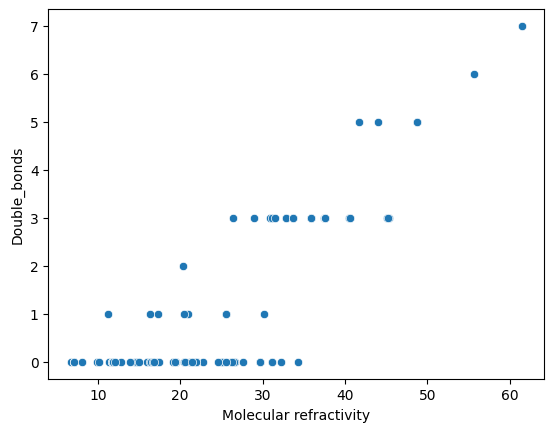

In [ ]:
sns.scatterplot(x='Molecular refractivity', y = 'Double_bonds', data = df)

<Axes: xlabel='Molecular refractivity', ylabel='Branching'>

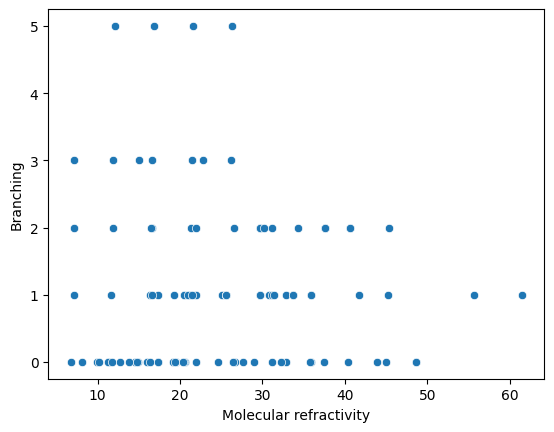

In [ ]:
sns.scatterplot(x='Molecular refractivity', y = 'Branching', data = df)

# Линейная регрессия

In [ ]:
columns = ["Molecular refractivity", "Double_bonds"]
data = df[columns]

In [ ]:
for column in data.columns:
    data[column] = data[column] / data[column].abs().max()

<ipython-input-261-88489f117102>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data[column] / data[column].abs().max()


In [ ]:
data

,Molecular refractivity,Double_bonds
0,0.425408,0.000000
1,0.502073,0.428571
2,0.207632,0.000000
3,0.132502,0.000000
4,0.282403,0.000000
...,...,...
95,0.611527,0.428571
96,0.524766,0.000000
97,0.507355,0.428571
98,0.471475,0.428571


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score


import tensorflow as tf

In [ ]:
df

,smiles,Molecular weight,Normal boiling point,Melting point,Critical temperature,Critical pressure,Critical volume,Heat of fusion,logP,Molecular refractivity,Double_bonds,Branching
0,C(Cl)(Cl)(Cl)Cl,153.82270,349.85,250.150,556.30,4540000.0,0.000276,NaN,2.55290,26.1430,0,3
1,C1=CC=C(C=C1)N,93.12648,457.25,267.150,705.00,5630000.0,0.000291,NaN,1.26880,30.8544,3,1
2,CCO,46.06844,351.39,159.050,514.00,6137000.0,0.000168,NaN,-0.00140,12.7598,0,0
3,CO,32.04186,337.65,175.150,512.50,8084000.0,0.000117,NaN,-0.39150,8.1428,0,0
4,CC(C)O,60.09502,355.36,183.650,508.30,4764000.0,0.000222,NaN,0.38710,17.3548,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,CC1=CC(=CC(=C1)O)C,122.16440,494.86,336.550,715.60,3800000.0,0.000396,-244400.0,2.00904,37.5808,3,2
96,CC1CCCCC1,98.18606,374.05,146.350,572.10,3480000.0,0.000369,NaN,2.58660,32.2490,0,0
97,CC1=CC=CC=C1,92.13842,383.75,179.200,591.75,4108000.0,0.000316,NaN,1.99502,31.1790,3,0
98,CC1=CC=NC=C1,93.12648,418.45,276.480,646.00,4650000.0,0.000300,NaN,1.39002,28.9740,3,0


In [ ]:
# Preprocess the data (drop "place" column and keep only numerical features)
# columns = ["Molecular refractivity", "Double_bonds"]
# dataLR = df[columns]

# Separate input features (X) and target variable (y)
X = data.drop(columns=["Double_bonds"])
y = data["Double_bonds"]

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Create the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict using the model
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print("Mean Squared Error:", mse)

Mean Squared Error: 0.02224088160357139


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
model.score(X_test, y_test)

0.5935996425361731

In [ ]:
for i, (actual, predicted) in enumerate(zip(y_test, y_pred), 1):
    if i % 1000 == 0:
        print(f"Iteration: {i}  |  Actual Double_bonds: {actual:.2f}  |  Predicted Double_bonds: {predicted:.2f}")

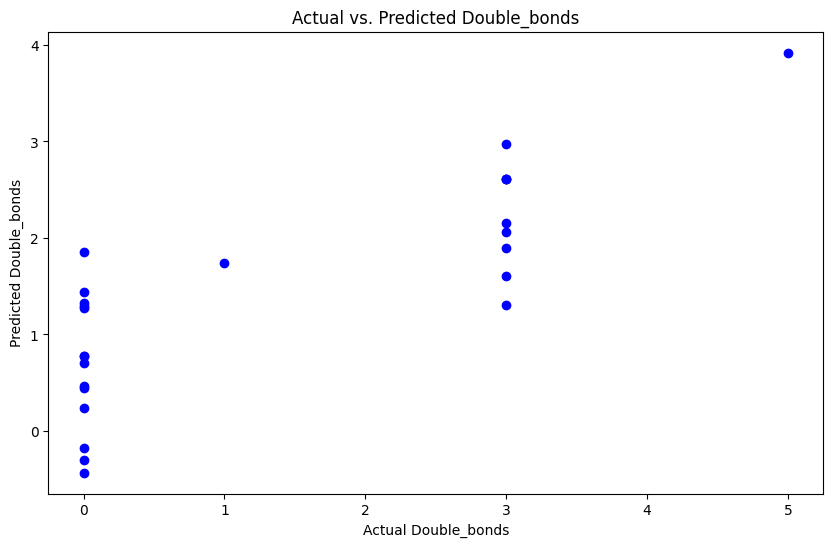

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Double_bonds")
plt.ylabel("Predicted Double_bonds")
plt.title("Actual vs. Predicted Double_bonds")
plt.show()

# RandomForestRegressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)

(80, 1) (20, 1) (80,) (20, 1)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)
reg.predict(X_test)

array([0.        , 0.00857143, 0.33428571, 0.01857143, 0.01857143,
       0.00142857, 0.        , 0.09      , 0.01857143, 0.01857143,
       0.        , 0.02571429, 0.45428571, 0.00428571, 0.39      ,
       0.03142857, 0.42857143, 0.39      , 0.08      , 0.01285714])

In [ ]:
reg.score(X_test, y_test)

0.7056473684210525

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {'n_estimators':[1, 2, 3, 4, 5, 10, 20, 100]}

grid_obj = RandomizedSearchCV(reg, parameters,n_jobs=-1)
grid_fit = grid_obj.fit(X_train, y_train)
best_fit = grid_fit.best_estimator_
best_fit.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


array([0.  , 0.05, 2.1 , 0.25, 0.25, 0.  , 0.  , 0.6 , 0.25, 0.25, 0.  ,
       0.2 , 3.2 , 0.  , 2.55, 0.35, 3.  , 2.55, 0.35, 0.  ])

In [ ]:
best_fit.score(X_test, y_test)

0.7038815789473685

# Neural Network model

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

In [ ]:
import keras

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
!pip install keras==2.9
!pip install patchify    #To install and import other mentioned libraries  in code
!pip install segmentation_models

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

def create_model(neurons, activation, optimizer, loss):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=(3,)))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(2, activation='softmax'))

    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    return model

In [ ]:
!pip uninstall tensorflow

!pip install tensorflow --ignore-installed

Found existing installation: tensorflow 2.13.0
Uninstalling tensorflow-2.13.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.13.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? ERROR: Operation cancelled by user
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

model = KerasClassifier(build_fn=create_model, verbose=0)

# neurons = [16, 64, 128, 256]
neurons = [16]
# batch_size = [10, 20, 50, 100]
batch_size = [10]
epochs = [10]
# activation = ['relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear', 'exponential']
activation = ['sigmoid', 'relu']
# optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
optimizer = ['SGD', 'Adadelta']
loss = ['squared_hinge']

param_grid = dict(neurons=neurons, batch_size=batch_size, epochs=epochs, activation=activation, optimizer=optimizer, loss=loss)

<ipython-input-170-2eae38a16eed>:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


In [ ]:
param_grid

{'neurons': [16],
 'batch_size': [10],
 'epochs': [10],
 'activation': ['sigmoid', 'relu'],
 'optimizer': ['SGD', 'Adadelta'],
 'loss': ['squared_hinge']}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)

(80, 1) (20, 1) (80,) (20, 1)


In [ ]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, error_score='raise')
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

AttributeError: ignored

In [ ]:
!pip install layers

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for layers: filename=layers-0.1.5-py3-none-any.whl size=5354 sha256=57f9b3f6846f80a53d20627de12223bdad930d54ad5c2e80c494baeac65e687c
  Stored in directory: /root/.cache/pip/wheels/68/7e/9a/eef1bfd14949d8154d75aaa90cb20916e5b3e706ccab344690
  Created wheel for bashutils: filename=Bashutils-0.0.4-py3-none-any.whl size=5459 sha256=0edee965a3b9ec26559892dc2f3cf9774e10b16fdfe0fe4dee0911773824f989
  Stored in directory: /root/.cache/pip/wheels/25/49/d6/964f90673b8cb71f4a9fd6b19fdf69321c355bc1b48b0b5094
Successfully built layers bashutils


In [ ]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(3,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='SGD', loss='squared_hinge', metrics=['accuracy'])

In [ ]:
import tensorflow as tf
import torch

In [ ]:
model.fit(X_train, y_train, batch_size=10, epochs=20, verbose=1, validation_data=(X_test, y_test))

Epoch 1/20


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


ValueError: ignored

In [ ]:
[test_loss, test_acc] = model.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

TypeError: ignored

# Нейросеть

In [ ]:
columns = ["Molecular refractivity", "Double_bonds"]
dataLR = df[columns]


X = dataLR.drop(columns=["Double_bonds"])
y = dataLR["Double_bonds"]

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(3,), activation='relu', solver='sgd', max_iter=5000, random_state=42)
mlp.fit(X, y)

MLPClassifier(hidden_layer_sizes=(3,), max_iter=5000, random_state=42,
              solver='sgd')

In [ ]:
mlp.coefs_, mlp.intercepts_

([array([[-0.3073061 ,  0.20846358,  0.40786382]]),
  array([[-0.68459923,  0.56726547,  0.15664334,  0.32233773, -0.74269137,
           0.72796559,  0.51500687],
         [-0.92014296, -0.10125799, -0.34001399, -0.08520496,  0.00332481,
          -0.58555437, -0.09390044],
         [ 0.05926772, -0.24822115, -0.25641279, -0.049381  , -0.1686093 ,
          -0.01503903, -0.32736104]])],
 [array([ 0.24166295, -1.2411794 , -0.42506244]),
  array([ 2.54695362,  0.25608148, -0.72833932, -0.7913469 , -1.18337739,
         -1.07618673,  0.11657642])])

In [ ]:
mlp.score(X, y)

0.77